<center><h1>Selección de características</h1></center>

## 1. Valores faltantes.

En el flujo de trabajo de aprendizaje automático, una vez que hemos seleccionado el modelo que queremos usar, el siguiente paso importante es seleccionar las características apropiadas para ese modelo. En esta lección, exploraremos cómo usar la correlación entre las funciones y la columna de destino, la correlación entre las funciones y la varianza de las funciones para seleccionar funciones. Continuaremos trabajando con el mismo conjunto de datos de vivienda de la última lección.

Nos centraremos específicamente en la selección de columnas de características que no tengan ningún valor faltante o que no necesiten ser transformadas para ser útiles (por ejemplo, columnas como Año de construcción y Año de remoción/agregación). Exploraremos cómo lidiar con ambos en una lección posterior de este curso.

Para comenzar, veamos qué columnas se incluyen en cualquiera de estas dos categorías.

### Ejercicio

- Lea AmesHousing.txt en un dataframe denominado `data`. Asegúrese de usar el delimitador `\t`.
- Cree un dataframe llamado `train`, que contiene las primeras 1460 filas de `data`.
- Cree un dataframe llamado `test`, que contiene el resto de las filas `data`.
- Seleccione las columnas de números enteros y flotantes de `train` y asígnelas a la variable `numerical_train`.
- Quite las siguientes columnas de `numerical_train`:
    - `PID` (la identificación del lugar no es útil para modelar)
    - `Year Built`
    - `Year Remod/Add`
    - `Garage Yr Blt`
    - `Mo Sold`
    - `Yr Sold`
- Calcule el número de valores faltantes de cada columna en `numerical_train`. Cree un objeto `pandas.Series` donde el índice se compone de nombres de columna y los valores asociados son el número de valores faltantes:
```python
Order                0
PID                  0
MS SubClass          0
MS Zoning            0
...
```
- Asigne este objeto `pandas.Series` a `null_series`. Seleccione el subconjunto de `null_series` para mantener solo las columnas sin valores faltantes y asigne el objeto `pandas.Series` resultante a `full_cols_series`.
- Muestre `full_cols_series` usando la función `print()`.

In [185]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns

In [186]:
data = pd.read_csv('AmesHousing.txt', delimiter='\t')
train = data[:1460].copy()
test = data[1460:].copy()

In [187]:
print(train.columns[train.dtypes == 'int64'], '\n')
print(train.columns[train.dtypes == 'float64'], '\n')

print(train.columns[train.dtypes == 'int64'].size)
print(train.columns[train.dtypes == 'float64'].size, )

Index(['Order', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice'],
      dtype='object') 

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object') 

28
11


In [188]:
numeric_cols_train = train.columns[(train.dtypes == 'int64') | (train.dtypes == 'float64')]
numerical_train = train[numeric_cols_train].copy()
numerical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   Lot Frontage     1211 non-null   float64
 4   Lot Area         1460 non-null   int64  
 5   Overall Qual     1460 non-null   int64  
 6   Overall Cond     1460 non-null   int64  
 7   Year Built       1460 non-null   int64  
 8   Year Remod/Add   1460 non-null   int64  
 9   Mas Vnr Area     1449 non-null   float64
 10  BsmtFin SF 1     1459 non-null   float64
 11  BsmtFin SF 2     1459 non-null   float64
 12  Bsmt Unf SF      1459 non-null   float64
 13  Total Bsmt SF    1459 non-null   float64
 14  1st Flr SF       1460 non-null   int64  
 15  2nd Flr SF       1460 non-null   int64  
 16  Low Qual Fin SF  1460 non-null   int64  
 17  Gr Liv Area   

In [189]:
cols_to_drop = [
    'PID',
    'Year Built',
    'Year Remod/Add',
    'Garage Yr Blt',
    'Mo Sold',
    'Yr Sold',
]

In [190]:
numerical_train.drop(columns=cols_to_drop, inplace=True)

In [191]:
print(numerical_train.columns)
print(numerical_train.columns.size)

Index(['Order', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')
33


In [192]:
print(type(
numerical_train.isnull().sum()
))

null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

<class 'pandas.core.series.Series'>
Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


## 2. Correlación de columnas de características con la columna objetivo.

Anteriormente, seleccionamos la característica para el modelo de regresión lineal simple al comparar cómo algunas de las características se correlacionan con la columna de destino. Si recuerda, nos enfocamos en 4 características en particular y usamos el método [`pandas.DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) para devolver los coeficientes de correlación entre cada par de columnas. Esto significa que la matriz de correlación para 4 columnas da como resultado 16 valores de correlación:

In [193]:
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr(), '\n')

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000 



El subconjunto de características en las que queremos centrarnos, full_cols_series, contiene 25 columnas

In [194]:
print(len(full_cols_series))

25


La matriz de correlación resultante contendrá 25 * 25 o 625 valores de correlación. Comparar y contrastar tantos valores es increíblemente difícil. En su lugar, centrémonos en cómo las variables se correlacionan con el precio (`SalePrice`).

### Ejercicio

- Calcule los coeficientes de correlación por pares entre todas las columnas en `train_subset = train[full_cols_series.index]`.

- Seleccione solo la columna SalePrice del marco de datos resultante, calcule el valor absoluto de cada término, ordene la Serie resultante por los valores de correlación y asigne a `sorted_corrs`.

In [195]:
train_subset = train[full_cols_series.index]
sorted_corrs = train_subset.corr()['SalePrice'].abs().sort_values(ascending=False)

## 3. Mapa de calor de matriz de correlación.
Ahora tenemos una lista decente de características candidatas para usar en nuestro modelo, ordenadas según su correlación con la columna `SalePrice`. Por ahora, mantengamos solo las características que tienen una correlación de 0.3 o superior. Este corte es un poco arbitrario y, en general, es una buena idea experimentar con este corte. Por ejemplo, puedes entrenar y probar modelos usando diferentes puntos de corte y ver dónde deja de mejorar el modelo.

Lo siguiente que debemos buscar es la posible **colinealidad** entre algunas de estas variables. La colinealidad se da cuando 2 variables (columnas) están altamente correlacionadas y corren el riesgo de duplicar información. Si tenemos 2 características que transmiten la misma información usando 2 medidas o métricas diferentes, no necesitamos conservar ambas.

Si bien podemos verificar la colinealidad entre 2 columnas usando la matriz de correlación, corremos el riesgo de sobrecarga de información. En su lugar, podemos generar un mapa de [calor de matriz de correlación](http://seaborn.pydata.org/examples/heatmap_annotation.html) usando Seaborn para comparar visualmente las correlaciones y buscar correlaciones de características por pares. Debido a que estamos buscando valores atípicos en el mapa de calor, esta representación visual es más fácil.

Así es como se ve el mapa de calor de la matriz de correlación de ejemplo de la documentación:

<img src="figs/correlation_heatmap_matrix.png" widht="800" height="600"/>


Para generar un mapa de calor de matriz de correlación, debemos pasar el dataframe que contiene la matriz de correlación como un dataframe a la función `seaborn.heatmap()`.

### Ejercicio

- Seleccione solo las columnas en `sorted_corrs` con una correlación superior a 0,3 y asígnelas a `strong_corrs`.
- Filtre `train_subset` utilizando los índices de `strong_corrs` y almacene las correlaciones en `corrmat`.
- Use la función [`seaborn.heatmap`](http://seaborn.pydata.org/generated/seaborn.heatmap.html) para generar un mapa de calor de matriz de correlación para las columnas en strong_corrs.

In [196]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()

In [197]:
print(corrmat)

               SalePrice  Overall Qual  Gr Liv Area  Garage Cars  Garage Area  \
SalePrice       1.000000      0.804562     0.698990     0.663485     0.662397   
Overall Qual    0.804562      1.000000     0.562903     0.609088     0.581106   
Gr Liv Area     0.698990      0.562903     1.000000     0.498711     0.465366   
Garage Cars     0.663485      0.609088     0.498711     1.000000     0.890509   
Garage Area     0.662397      0.581106     0.465366     0.890509     1.000000   
1st Flr SF      0.657119      0.490056     0.515404     0.441351     0.477281   
Full Bath       0.518194      0.505102     0.625981     0.468295     0.402743   
Fireplaces      0.485683      0.386205     0.460746     0.342560     0.302616   
TotRms AbvGrd   0.483701      0.360203     0.807301     0.343422     0.295586   
Open Porch SF   0.344383      0.319954     0.321806     0.190875     0.218563   
Wood Deck SF    0.319104      0.260258     0.238396     0.227391     0.219300   

               1st Flr SF  

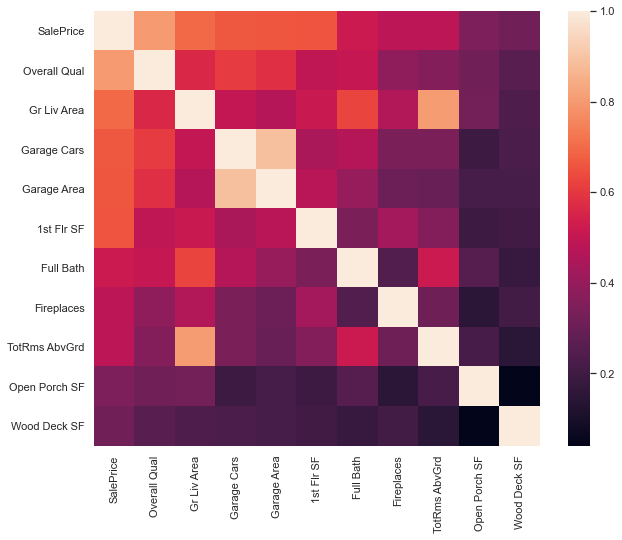

In [198]:
plt.figure(figsize=(10,8))
sns.heatmap(corrmat)
plt.show()

## 4. Modelo de entrenamiento y prueba.
Según el mapa de calor de la matriz de correlación, podemos decir que los siguientes pares de columnas están fuertemente correlacionados:

- Gr Liv Area y TotRms AbvGrd
- Garage Area y Garage Cars

Si leemos las descripciones de estas columnas de la documentación de datos, podemos decir que cada par de columnas refleja información muy similar. Debido a que `Gr Liv Area` y `Garage Area` son variables continuas que captan más matices, eliminemos `TotRms AbvGrd` y `Garage Cars`.

Lo último que debemos hacer es confirmar que el conjunto de prueba no contiene valores faltantes para estas columnas:

In [199]:
print(strong_corrs, '\n')
print(strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd']))

SalePrice        1.000000
Overall Qual     0.804562
Gr Liv Area      0.698990
Garage Cars      0.663485
Garage Area      0.662397
1st Flr SF       0.657119
Full Bath        0.518194
Fireplaces       0.485683
TotRms AbvGrd    0.483701
Open Porch SF    0.344383
Wood Deck SF     0.319104
Name: SalePrice, dtype: float64 

SalePrice        1.000000
Overall Qual     0.804562
Gr Liv Area      0.698990
Garage Area      0.662397
1st Flr SF       0.657119
Full Bath        0.518194
Fireplaces       0.485683
Open Porch SF    0.344383
Wood Deck SF     0.319104
Name: SalePrice, dtype: float64


In [200]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
print(test[final_corr_cols.index].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1470 non-null   int64  
 1   Overall Qual   1470 non-null   int64  
 2   Gr Liv Area    1470 non-null   int64  
 3   Garage Area    1469 non-null   float64
 4   1st Flr SF     1470 non-null   int64  
 5   Full Bath      1470 non-null   int64  
 6   Fireplaces     1470 non-null   int64  
 7   Open Porch SF  1470 non-null   int64  
 8   Wood Deck SF   1470 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 103.5 KB
None


Parece que el conjunto de prueba tiene **una fila** en la que falta un valor para `Garage Area`. Quitemos esta fila por ahora. Finalmente, entrenemos y probemos un modelo usando estas columnas para ver cómo les va.

### Ejercicio

- Filtre el dataframe `test` para que solo contenga las columnas de `final_corr_cols.index`. Luego, quite la fila que contiene los valores faltantes y asigne el resultado a `clean_test`
- Cree un modelo de regresión lineal.
- Calcule el RMSE en los conjuntos de prueba y entrenamiento.
- Asigne el RMSE de tren a `train_rmse` y el RMSE de prueba a `test_rmse`.

In [201]:
clean_test = test[final_corr_cols.index].dropna().copy()
print(clean_test)

      SalePrice  Overall Qual  Gr Liv Area  Garage Area  1st Flr SF  \
1460     274000             9         1947        725.0        1366   
1461     300000             8         1786        715.0        1786   
1462     255900             8         2290        779.0        1149   
1463     224900             7         1768        543.0         884   
1464     240000             7         2327        596.0        1129   
...         ...           ...          ...          ...         ...   
2925     142500             6         1003        588.0        1003   
2926     131000             5          902        484.0         902   
2927     132000             5          970          0.0         970   
2928     170000             5         1389        418.0        1389   
2929     188000             7         2000        650.0         996   

      Full Bath  Fireplaces  Open Porch SF  Wood Deck SF  
1460          2           1            116           168  
1461          2           1  

In [202]:
features = final_corr_cols[1:].index.values.tolist()
target = 'SalePrice'

In [203]:
lr = LinearRegression()
lr.fit(train[features], train[target])


LinearRegression()

In [204]:
train_mse = mean_squared_error(lr.predict(train[features]), train[target])
test_mse = mean_squared_error(lr.predict(clean_test[features]), clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [205]:
print(train_rmse)
print(test_rmse)

34173.97629185851
41032.02612019744


## 5. Eliminación de características de baja varianza.
La última técnica que exploraremos es eliminar características con poca variación. Cuando los valores de una columna de características tienen una varianza baja, no contribuyen significativamente a la capacidad predictiva del modelo. En el extremo, imaginemos una columna con una varianza de 0. Esto significaría que todos los valores en esa columna **son exactamente iguales**. Esto significa que la columna no es informativa y no ayudará al modelo a hacer mejores predicciones.

Para hacer comparaciones de manzanas con manzanas entre columnas, necesitamos reescalar todas las columnas para que varíen entre 0 y 1. Esto se conoce como escalado mínimo-máximo (min.max) o [reescalado](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling). Aquí está la fórmula para cambiar la escala:

$$\dfrac{x - \min(x)} {\max(x) - \min(x)}$$

donde

- $x$ es un valor individual
- $\min(x)$ es el valor mínimo en la columna a la que pertenece $x$
- $\max(x)$ es el valor máximo en la columna a la que pertenece $x$

### Ejercicio

- Seleccione las columnas en `features` del dataframe de entrenamiento. Vuelva a escalar cada una de las columnas para que los valores oscilen entre `0` y `1`, utilizando `train[features]` en lugar de $x$  en la fórmula anterior. Asigne el resultado a `unit_train`.
- Calcule y muestre los valores mínimo y máximo de la columna de `unit_train` para asegurarse de que todos los valores van de `0` a `1`.


In [206]:
unit_train = (train[features] - train[features].min()) / (train[features].max() - train[features].min())
print(unit_train.describe())

       Overall Qual  Gr Liv Area  Garage Area   1st Flr SF    Full Bath  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       0.567580     0.351245     0.318119     0.335449     0.391438   
std        0.156512     0.151916     0.142642     0.160668     0.136459   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.444444     0.238091     0.224798     0.211704     0.250000   
50%        0.555556     0.339274     0.322581     0.307229     0.500000   
75%        0.666667     0.429439     0.387097     0.434703     0.500000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

        Fireplaces  Open Porch SF  Wood Deck SF  
count  1460.000000    1460.000000   1460.000000  
mean      0.198402       0.084983      0.138207  
std       0.215846       0.118058      0.181836  
min       0.000000       0.000000      0.000000  
25%       0.000000       0.000000      0.000000  
50%       0.333333      

## 6. Modelo Final.
Calculemos las varianzas y eliminemos las columnas con la varianza más baja.

In [207]:
print(unit_train.var().sort_values())

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


Vemos que `Open Porch SF` es la columna con la varianza más baja y está más alejada de `Full Bath` que `Full Bath` de la siguiente.

Para concluir este ejercicio, eliminemos `Open Porch SF` y entrenemos y probemos un modelo usando las funciones restantes.

In [208]:
print(unit_train.var().sort_values()[1] - unit_train.var().sort_values()[0]  )
print(unit_train.var().sort_values()[2] - unit_train.var().sort_values()[1]  )

0.004683363469317758
0.0017256722972076727


In [209]:
unit_train.var().sort_values().diff()

Open Porch SF         NaN
Full Bath        0.004683
Garage Area      0.001726
Gr Liv Area      0.002732
Overall Qual     0.001417
1st Flr SF       0.001318
Wood Deck SF     0.007250
Fireplaces       0.013525
dtype: float64

### Ejercicio
- Elimina `Open Porch SF` de las características.
- Cree un modelo de regresión lineal utilizando las funciones restantes.
- Calcule el RMSE en los conjuntos de prueba y entrenamiento.
    - Use `clean_test` 
- Asigne el RMSE de entrenamiento a `train_rmse_2` y el RMSE de prueba a `test_rmse_2`.
- Muestra ambos valores RMSE usando la función `print()`

In [210]:
print(features)

['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF', 'Full Bath', 'Fireplaces', 'Open Porch SF', 'Wood Deck SF']


In [211]:
features.remove('Open Porch SF')
print(features)

print(len(features))

['Overall Qual', 'Gr Liv Area', 'Garage Area', '1st Flr SF', 'Full Bath', 'Fireplaces', 'Wood Deck SF']
7


In [212]:
lr = LinearRegression()
lr.fit(train[features], train[target])


train_rmse_2 = np.sqrt(mean_squared_error(
    lr.predict(train[features]),
    train[target],
))

test_rmse_2 = np.sqrt(mean_squared_error(
    lr.predict(clean_test[features]),
    clean_test[target],
)
)

print(train_rmse_2)
print(test_rmse_2)

34372.696707783965
40591.42702437728


Pudimos mejorar el valor RMSE a aproximadamente 40591 al eliminar la variable `Open Porch SF`. Lo más probable es que esto sea lo más lejos que podamos llegar sin transformar y utilizar las otras funciones en el conjunto de datos, así que nos detendremos aquí por ahora. En las próximas 2 lecciones, exploraremos 2 formas diferentes de ajustar modelos. Luego, exploraremos formas de limpiar y diseñar nuevas funciones a partir de las funciones existentes para mejorar aún más la precisión del modelo.